In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import load_breast_cancer

In [7]:
data = load_breast_cancer()
X = data.data[:,:2]
y = data.target

In [5]:
df = pd.DataFrame(data.data[:,:2], columns=data.feature_names[:2])
df['target'] = data.target
df['target'].value_counts()

target
1    357
0    212
Name: count, dtype: int64

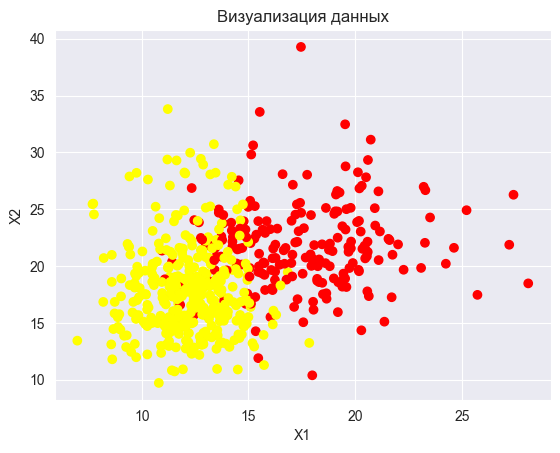

In [8]:
plt.scatter(X[:,0], X[:,1], c=y, cmap='autumn')

plt.title("Визуализация данных")
plt.xlabel('X1')
plt.ylabel('X2')

plt.show()

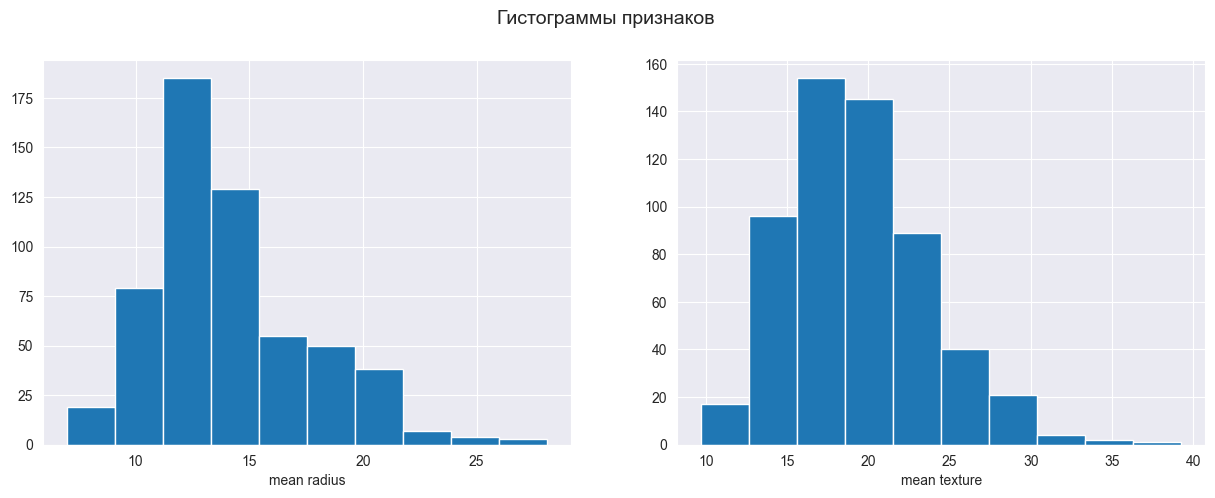

In [9]:
plt.figure(figsize=(15, 5))
for i in range(2):    
    plt.subplot(1, 2, i+1)
    plt.hist(X[:, i])
    plt.xlabel(data.feature_names[i])
plt.suptitle('Гистограммы признаков',fontsize=14)
plt.show()

In [10]:
from sklearn.naive_bayes import GaussianNB

In [11]:
gaussian_nb = GaussianNB()
gaussian_nb.fit(X, y)

GaussianNB()

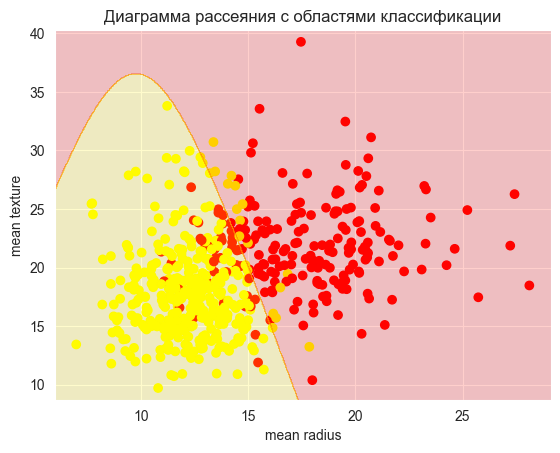

In [14]:
X0 = np.linspace(X[:, 0].min()-1,X[:, 0].max()+1, X.shape[0])
X1 = np.linspace(X[:, 1].min()-1,X[:, 1].max()+1, X.shape[0])

X0_grid, X1_grid = np.meshgrid(X0, X1)

XX = np.array([X0_grid.ravel(), X1_grid.ravel()]).T

Z = gaussian_nb.predict(XX).reshape(X0_grid.shape)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='autumn')
plt.contourf(X0_grid, X1_grid, Z, cmap='autumn', alpha=0.2)

plt.xlabel('mean radius')
plt.ylabel('mean texture')
plt.title("Диаграмма рассеяния с областями классификации")
plt.show()

In [15]:
y_pred = gaussian_nb.predict(X)

In [16]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

In [17]:
print(confusion_matrix(y, y_pred))
print("Accuracy: ", accuracy_score(y, y_pred))
print("F1 Score: ", f1_score(y, y_pred))

[[164  48]
 [ 17 340]]
Accuracy:  0.8857644991212654
F1 Score:  0.912751677852349


In [ ]:
# На использованном в работе наборе данных примените другие вариации модели наивного Байеса - Мультономиальный, Бернулли, категориальные и комплементарный. Для каждой модели сделайте вывод о ее применимости.

In [18]:
from sklearn.naive_bayes import MultinomialNB
multinomial_nb = MultinomialNB().fit(X, y)
y_pred = multinomial_nb.predict(X)
print(confusion_matrix(y, y_pred))
print("Accuracy: ", accuracy_score(y, y_pred))
print("F1 Score: ", f1_score(y, y_pred))
# Для классификации и обработки текстов

[[ 36 176]
 [  7 350]]
Accuracy:  0.6783831282952548
F1 Score:  0.7927519818799547


In [19]:
from sklearn.naive_bayes import ComplementNB
complement_nb = ComplementNB().fit(X, y)
y_pred = complement_nb.predict(X)
print(confusion_matrix(y, y_pred))
print("Accuracy: ", accuracy_score(y, y_pred))
print("F1 Score: ", f1_score(y, y_pred))

[[134  78]
 [136 221]]
Accuracy:  0.6239015817223199
F1 Score:  0.6737804878048781


In [20]:
from sklearn.naive_bayes import BernoulliNB
bernoulli_nb = BernoulliNB().fit(X, y)
y_pred = bernoulli_nb.predict(X)
print(confusion_matrix(y, y_pred))
print("Accuracy: ", accuracy_score(y, y_pred))
print("F1 Score: ", f1_score(y, y_pred))
# Подходит для бинарных признаков

[[  0 212]
 [  0 357]]
Accuracy:  0.6274165202108963
F1 Score:  0.7710583153347732


In [21]:
from sklearn.naive_bayes import CategoricalNB
categorical_nb = CategoricalNB().fit(X, y)
y_pred = categorical_nb.predict(X)
print(confusion_matrix(y, y_pred))
print("Accuracy: ", accuracy_score(y, y_pred))
print("F1 Score: ", f1_score(y, y_pred))

[[178  34]
 [ 21 336]]
Accuracy:  0.9033391915641477
F1 Score:  0.9243466299862448


In [ ]:
# Все кроме первого больше подходят для распределений с категориальными значениями и дискретными распределениями, чем с непрерывными 

In [22]:
X = data.data
y = data.target
X.shape, y.shape

((569, 30), (569,))

In [23]:
gaussian_nb.fit(X, y)
y_pred = gaussian_nb.predict(X)
print(confusion_matrix(y, y_pred))
print("Accuracy: ", accuracy_score(y, y_pred))
print("F1 Score: ", f1_score(y, y_pred))

[[189  23]
 [ 10 347]]
Accuracy:  0.9420035149384886
F1 Score:  0.9546079779917469


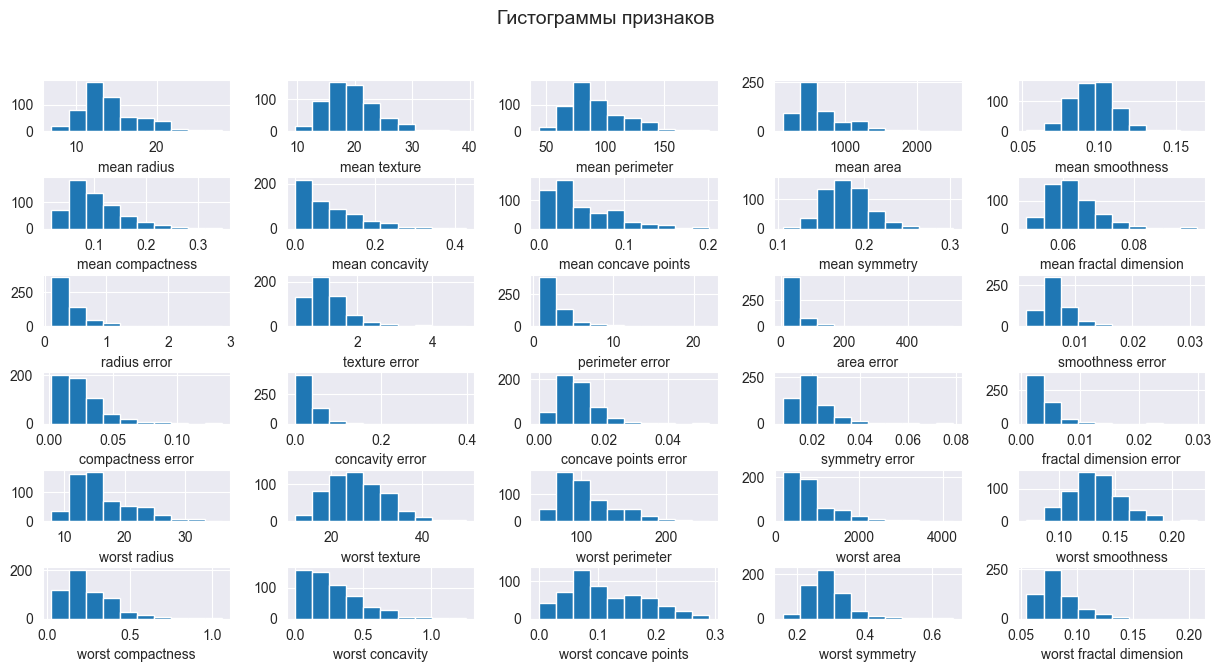

In [24]:
f = plt.figure(figsize=(15, 7))
for i in range(30):
    plt.subplot(6, 5, i+1)
    plt.hist(X[:, i])
    
    plt.xlabel(data.feature_names[i])
f.subplots_adjust(hspace=0.9,wspace=0.3)    
plt.suptitle('Гистограммы признаков',fontsize=14)
plt.show()

In [25]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df = df.drop(['mean concavity','radius error', 
              'perimeter error', 'area error', 
              'compactness error', 'concavity error',
              'fractal dimension error', 'worst area', 
              'worst concavity'], 
             axis=1)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concave points,mean symmetry,mean fractal dimension,texture error,...,concave points error,symmetry error,worst radius,worst texture,worst perimeter,worst smoothness,worst compactness,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.14710,0.2419,0.07871,0.9053,...,0.01587,0.03003,25.38,17.33,184.60,0.1622,0.6656,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.07017,0.1812,0.05667,0.7339,...,0.01340,0.01389,24.99,23.41,158.80,0.1238,0.1866,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.12790,0.2069,0.05999,0.7869,...,0.02058,0.02250,23.57,25.53,152.50,0.1444,0.4245,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.10520,0.2597,0.09744,1.1560,...,0.01867,0.05963,14.91,26.50,98.87,0.2098,0.8663,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.10430,0.1809,0.05883,0.7813,...,0.01885,0.01756,22.54,16.67,152.20,0.1374,0.2050,0.1625,0.2364,0.07678


In [26]:
X = df
y = data.target
X.shape, y.shape

((569, 21), (569,))

In [27]:
gaussian_nb = GaussianNB().fit(X, y)
y_pred = gaussian_nb.predict(X)
print(confusion_matrix(y, y_pred))
print('Accuracy= ', accuracy_score(y, y_pred))
print('F1_score= ', f1_score(y, y_pred))

[[196  16]
 [ 15 342]]
Accuracy=  0.945518453427065
F1_score=  0.9566433566433566


In [79]:
data = pd.read_csv("https://raw.githubusercontent.com/rolandmueller/titanic/main/titanic3.csv")
df = data.copy()
data

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


In [80]:
from sklearn.preprocessing import LabelEncoder

df.loc[:, 'age'] = df['age'].fillna(df['age'].mean())
df.loc[:, 'embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])
df.loc[:, 'fare'] = df['fare'].fillna(df['fare'].mean())


# Кодируем категориальные переменные
label_encoder = LabelEncoder()
df['sex'] = label_encoder.fit_transform(df['sex']) 
df['embarked'] = label_encoder.fit_transform(df['embarked']) 

# Выбираем признаки и целевую переменную
X = df[['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']]
y = df['survived']


In [81]:
# Загрузите набор данных о выживших на титанике, прилагающийся к этой работе. Повторите на нем моделирование из методических указаний. Попробуйте разные варианты байесовского классификатора в зависимости от форм расрпеделния эмпирических данных.

gnb = GaussianNB().fit(X, y)
y_pred_gnb = gnb.predict(X)
print("GaussianNB")
print(confusion_matrix(y, y_pred_gnb))
print("Accuracy:", accuracy_score(y, y_pred_gnb))
print("F1 Score:", f1_score(y, y_pred_gnb))

# BernoulliNB (подходит для бинарных данных)
bnb = BernoulliNB().fit(X, y)
y_pred_bnb = bnb.predict(X)
print("\nBernoulliNB")
print(confusion_matrix(y, y_pred_bnb))
print("Accuracy:", accuracy_score(y, y_pred_bnb))
print("F1 Score:", f1_score(y, y_pred_bnb))

# CategoricalNB (подходит для категориальных данных)
cnb = CategoricalNB().fit(X, y)
y_pred_cnb = cnb.predict(X)
print("\nCategoricalNB")
print(confusion_matrix(y, y_pred_cnb))
print("Accuracy:", accuracy_score(y, y_pred_cnb))
print("F1 Score:", f1_score(y, y_pred_cnb))

# ComplementNB
complement_nb = ComplementNB().fit(X, y)
y_pred = complement_nb.predict(X)
print(confusion_matrix(y, y_pred))
print("Accuracy: ", accuracy_score(y, y_pred))
print("F1 Score: ", f1_score(y, y_pred))

GaussianNB
[[657 152]
 [134 366]]
Accuracy: 0.7815126050420168
F1 Score: 0.7190569744597249

BernoulliNB
[[673 136]
 [153 347]]
Accuracy: 0.7792207792207793
F1 Score: 0.7060020345879959

CategoricalNB
[[708 101]
 [171 329]]
Accuracy: 0.7922077922077922
F1 Score: 0.7075268817204301
[[667 142]
 [274 226]]
Accuracy:  0.6822001527883881
F1 Score:  0.5207373271889401
